In [1]:
import pandas as pd
import numpy as np 
import glob as glob
import skimage 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, InputLayer
import tensorflow as tf

In [2]:
data=pd.read_csv('Dataset/emergency_classification.csv')
data.head()

,image_names,emergency_or_not
0,0.jpg,1
1,1.jpg,1
2,2.jpg,1
3,3.jpg,1
4,4.jpg,1


In [3]:
data.emergency_or_not.value_counts()

emergency_or_not
0    1361
1     991
Name: count, dtype: int64

In [4]:
X=[]
for img_name in data.image_names:
    img=plt.imread('Dataset/images/'+img_name)
    X.append(img)
X=np.array(X)
y=data.emergency_or_not.values

In [5]:
X.shape

(2352, 224, 224, 3)

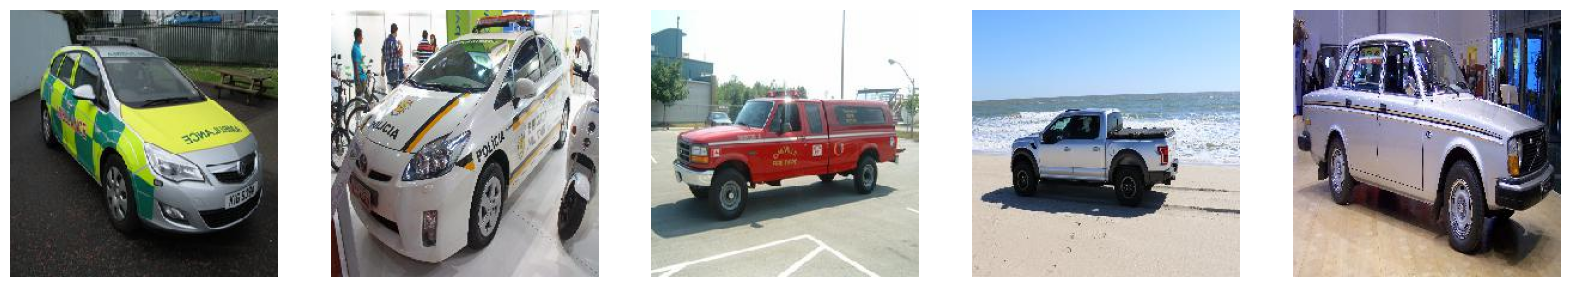

In [6]:
# visualizing images
fig,ax = plt.subplots(nrows=1,ncols=5,figsize=(20,20))
for i in range(5):
    ax[i].imshow(X[i*400])
    ax[i].axis('off')

In [7]:
# converting 3 dimensional image to 1 dimensional image
X = X.reshape(X.shape[0], 224*224*3)
X.shape

(2352, 150528)

In [8]:
# normalizing the pixel values
X = X / X.max()

In [9]:
# minimum and maximum pixel values of images after normalizing
X.min(), X.max()

(0.0, 1.0)

In [10]:
# create random number generator
seed = 42
rng = np.random.RandomState(seed)

# Creating traing and Validation set

In [11]:
# creating a training and validation set
X_train, X_valid, y_train, y_valid=train_test_split(X,y,test_size=0.3, random_state=seed)

In [12]:
(X_train.shape,y_train.shape),(X_valid.shape,y_valid.shape)

(((1646, 150528), (1646,)), ((706, 150528), (706,)))

# Defining Model Architecture

In [13]:
model=Sequential()
model.add(InputLayer(X_train.shape[1],))
model.add(Dense(200,activation='sigmoid'))
model.add(Dense(units=1,activation='sigmoid'))

# Compling and traing the model

In [14]:
model.compile(loss='binary_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [15]:
model_history=model.fit(X_train,y_train,epochs=50,batch_size=100,validation_data=(X_valid,y_valid))

Epoch 1/50
17/17 [==============================] - 7s 151ms/step - loss: 0.8989 - accuracy: 0.5632 - val_loss: 0.6628 - val_accuracy: 0.5652
Epoch 2/50
17/17 [==============================] - 1s 69ms/step - loss: 0.6370 - accuracy: 0.6458 - val_loss: 0.6279 - val_accuracy: 0.6431
Epoch 3/50
17/17 [==============================] - 1s 64ms/step - loss: 0.6212 - accuracy: 0.6580 - val_loss: 0.6112 - val_accuracy: 0.6756
Epoch 4/50
17/17 [==============================] - 1s 57ms/step - loss: 0.6370 - accuracy: 0.6482 - val_loss: 0.5964 - val_accuracy: 0.6841
Epoch 5/50
17/17 [==============================] - 1s 57ms/step - loss: 0.5991 - accuracy: 0.6902 - val_loss: 0.6012 - val_accuracy: 0.6686
Epoch 6/50
17/17 [==============================] - 1s 55ms/step - loss: 0.5695 - accuracy: 0.7035 - val_loss: 0.5780 - val_accuracy: 0.6912
Epoch 7/50
17/17 [==============================] - 1s 48ms/step - loss: 0.5978 - accuracy: 0.6889 - val_loss: 0.6464 - val_accuracy: 0.6317
Epoch 8/50
1

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               30105800  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
Total params: 30,106,001
Trainable params: 30,106,001
Non-trainable params: 0
_________________________________________________________________


# Evaluating the model

In [17]:
predictions = model.predict(X_valid)[:,0]

In [18]:
prediction = predictions.reshape(-1,)

# converting probabilities to classes
prediction_int = prediction >= 0.5
prediction_int = prediction_int.astype(int)


In [19]:
# accuracy on validation set
from sklearn.metrics import accuracy_score
print('Accuracy on validation set:', accuracy_score(y_valid, prediction_int), '%')

Accuracy on validation set: 0.7365439093484419 %


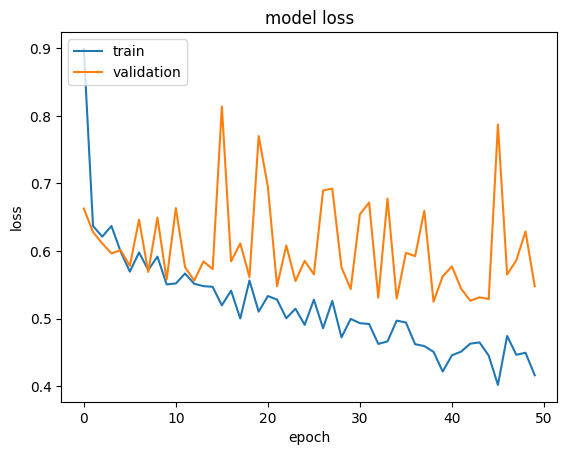

In [20]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

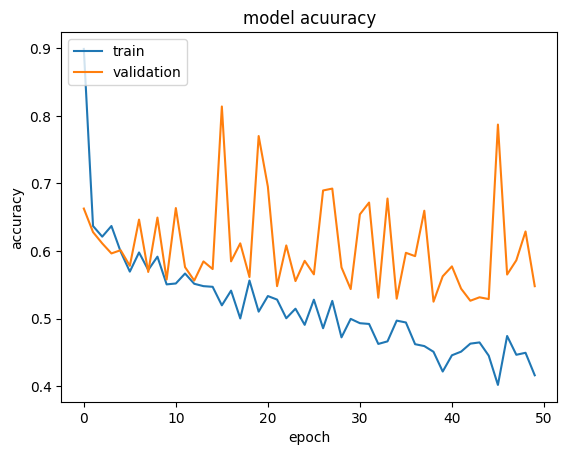

In [21]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model acuuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Model is 44 % sure that it is emergency
And actual class is  0


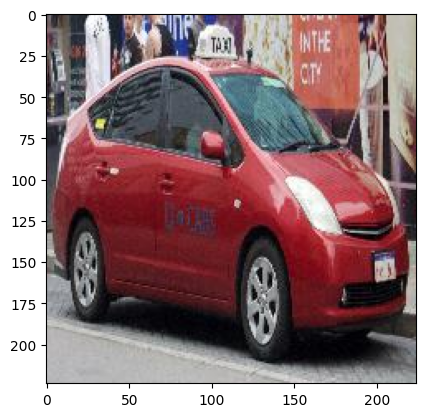

In [22]:
# pull out the original images from the data which correspond to the validation data
_, valid_vehicles, _, valid_y = train_test_split(data.image_names.values, y, test_size=0.3, random_state=seed)

# get a random index to plot image randomly
index = rng.choice(range(len(valid_vehicles)))

# get the corresponding image name and probability
img_name = valid_vehicles[index]
prob = (predictions * 100).astype(int)[index]

# read the image
img = plt.imread('Dataset/images/' + img_name)

# print probability and actual class
print('Model is', prob , '% sure that it is emergency')
print('And actual class is ', valid_y[index])

# plot image
plt.imshow(img)

# Hyperparameter Tunning
    
     


In [23]:
# using relu as activation function in hidden layer
model=Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

# compiling the model
model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])
# training the model for 50 epochs
model_history = model.fit(X_train, y_train, epochs=80, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/80
13/13 [==============================] - 2s 126ms/step - loss: 0.6896 - accuracy: 0.5486 - val_loss: 0.6828 - val_accuracy: 0.5595
Epoch 2/80
13/13 [==============================] - 1s 74ms/step - loss: 0.6700 - accuracy: 0.5826 - val_loss: 0.6712 - val_accuracy: 0.5637
Epoch 3/80
13/13 [==============================] - 1s 70ms/step - loss: 0.6621 - accuracy: 0.5966 - val_loss: 0.6626 - val_accuracy: 0.5836
Epoch 4/80
13/13 [==============================] - 1s 67ms/step - loss: 0.6546 - accuracy: 0.6264 - val_loss: 0.6559 - val_accuracy: 0.5949
Epoch 5/80
13/13 [==============================] - 1s 70ms/step - loss: 0.6478 - accuracy: 0.6306 - val_loss: 0.6461 - val_accuracy: 0.6629
Epoch 6/80
13/13 [==============================] - 1s 62ms/step - loss: 0.6413 - accuracy: 0.6482 - val_loss: 0.6406 - val_accuracy: 0.6657
Epoch 7/80
13/13 [==============================] - 1s 60ms/step - loss: 0.6369 - accuracy: 0.6598 - val_loss: 0.6364 - val_accuracy: 0.6586
Epoch 8/80
1

In [24]:
# getting predictions in the form of class as well as probabilities

predictions = model.predict(X_valid)[:, 0]
prediction = predictions.reshape(-1,)

# converting probabilities to classes
prediction_int = prediction >= 0.5
prediction_int = prediction_int.astype(int)
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid,prediction_int), '%')

Accuracy on validation set: 0.7096317280453258 %


Model is 82 % sure that it is emergency
And actual class is  1


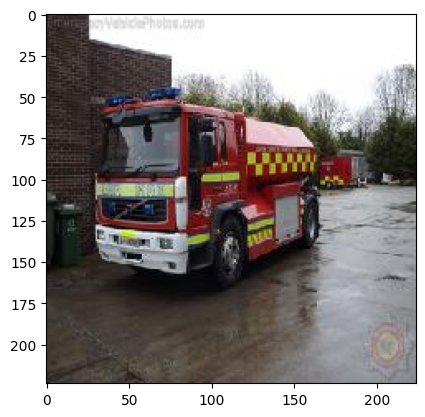

In [25]:
# pull out the original images from the data which correspond to the validation data
_, valid_vehicles, _, valid_y = train_test_split(data.image_names.values, y, test_size=0.3, random_state=seed)

# get a random index to plot image randomly
index = rng.choice(range(len(valid_vehicles)))

# get the corresponding image name and probability
img_name = valid_vehicles[index]
prob = (predictions * 100).astype(int)[index]

# read the image
img = plt.imread('Dataset/images/' + img_name)

# print probability and actual class
print('Model is', prob , '% sure that it is emergency')
print('And actual class is ', valid_y[index])

# plot image
plt.imshow(img)